In [2]:
import numpy as np
import matplotlib.pyplot as plt
from steady_states import SteadyStates
from hh_model import HH_neuron

In [3]:
def make_stimulus_current(N, t_gap, t_dur, amps):
    curr = np.zeros(N)
    for i, amp in enumerate(amps):
        if i == 0:
            curr[i:t_dur] = amp
        else:
            idx_start = i * (1 + t_dur + t_gap)
            idx_stop = idx_start + t_dur
            curr[idx_start:idx_stop] = amp

    return curr

In [4]:
t_end = 100e-3 # [s]
dt = 0.01e-3 # [s]
N = int(t_end / dt)
ts = np.linspace(0, t_end, N)

g_na = 120e-3 # [Siemens]
g_k = 36e-3 # [Siemens]
g_l = 0.3e-3 # [Siemens]
V_na = 115e-3 # [V]
V_k = -12e-3 # [V]
V_l = 10.6e-3 # [V]
V_rest = 0 # [V]
Cm = 1e-6 # [F]

In [17]:
g_d = 0.35e-6 # delayed rectifier conductance [S]
g_oCa = 3.2e-6 # calcium-activated outward current [S]
g_A = 2.2e-6 # A-type potassium current [S]
g_Ca1 = 0.21e-6 # calcium current 1 [S]
g_Ca2 = 0.047e-6 # calcium current 2 [S]
g_Na = 2.3e-6 # sodium current [S]
g_l = 0.1e-6 # leak current [S]

In [18]:
E_K = -80e-3 # reverse potential for potassium [V]
E_Na = 50e-3 # reverse potential for sodium [V]
E_l = 50e-3 # reverse potential for leak [V]
E_h = -10e-3 # reverse potential for invard rectifier [V]
# E_Ca is defined in the HH_neuron class

In [19]:
c_n = 180 # [Hz]
k_oa = 600 # [Hz]
k_ob = 35 # [Hz]
k_Ca = 360 # [Hz]

k_A = 140 # [Hz]
k_A1 = 50 # [Hz]
c_A2 = 3.6 # [Hz]

k_aCa1 = 50 # [Hz]
k_bCa1 = 16 # [Hz]
k_aCa2 = 10 # [Hz]
c_r = 0.33 # [Hz]

k_m = 10e3  # [Hz]
k_h = 500 # [Hz]

In [20]:
V_n = -25e-3 # half-maximum potential [V]
V_kn = 10e-3 # half-maximum potential [V]
V_ao1 = 0 # half-maximum potential [V]
V_ao2 = -16 # half-maximum potential [V]

V_A = -12e-3 # half-maximum potential [V]
V_B = -62e-3 # half-maximum potential [V]
V_A2 = -40e-3 # half-maximum potential [V]
V_X = 7e-3 # half-maximum potential [V]

V_aCa1 = -11e-3 # half-maximum potential [V]
V_bCa1 = -50e-3 # half-maximum potential [V]
V_aCa2 = 22e-3 # half-maximum potential [V]

V_r = -70e-3 # half-maximum potential [V]
V_kr = -110e-3 # half-maximum potential [V]
V_am = -6e-3 # half-maximum potential [V]
V_bm = -34e-3 # half-maximum potential [V]
V_ah = -39e-3 # half-maximum potential [V]
V_bh = -40e-3 # half-maximum potential [V]

In [21]:
s_n = -17e-3 # [V]
s_kn = -22e-3 # [V]
s_ao1 = -23e-3 # [V]
s_ao2 = -5e-3 # [V]

s_A = -26e-3 # [V]
s_B = 6e-3 # [V]
s_A2 = -12e-3 # [V]
s_X = -15e-3 # [V]

s_aCa1 = -7e-3 # [V]
s_bCa1 = 8e-3 # [V]
s_aCa2 = -7e-3 # [V]

s_r = 7e-3 # [V]
s_kr = -13e-3 # [V]
s_am = -20e-3 # [V]
s_bm = -13e-3 # [V]
s_ah = -8e-3 # [V]
s_bh = -5e-3 # [V]

In [22]:
f = 0.6e3 # [V / M]
c1 = 2.5e-6 # [M]
c2 = 0.7e-6 # [M]
c3 = 0.6e-6 # [M]
d_Ca_deg = 0.05e-6 # [M]
c_iCa = 300e3 # [M / C]

c_am = 0.11e3 # [1/V]
c_bm = 15
c_ah = 0.08
c_m = 1.7e-9 # [F]

In [5]:
T_1 = 6.3 # [deg C]

t_gap_1 = 10e-3 # [s]
t_dur_1 = 5e-3 # [s]
N_gap_1 = int(t_gap_1 / dt)
N_dur_1 = int(t_dur_1 / dt)
amps_1 = np.array([2, 3, 4, 6, 8]) * 1e-6 # [A]
i_stim_1 = make_stimulus_current(N, t_gap=N_gap_1, 
                                 t_dur=N_dur_1, amps=amps_1)

In [6]:
T_2 = 28 # [deg C]

t_gap_2 = 10e-3 # [s]
t_dur_2 = 5e-3 # [s]
N_gap_2 = int(t_gap_1 / dt)
N_dur_2 = int(t_dur_1 / dt)
amps_2 = np.array([2, 4, 8, 16, 32]) * 1e-6 # [A]
i_stim_2 = make_stimulus_current(N, t_gap=N_gap_2, 
                                 t_dur=N_dur_2, amps=amps_2)

In [7]:
# fig, ax = plt.subplots(1, 1)
# ts = np.linspace(0, t_dur_1, N_gap_1)
# ax.plot(i_stim_1)

In [8]:
HHs = [HH_neuron(T=T_1, t_end=t_end, dt=dt,
                 g_na=g_na, g_k=g_k, g_l=g_l,
                 V_na=V_na, V_k=V_k, V_l=V_l, V_rest=V_rest,
                 Cm=Cm, I_stimulus=i_stim_1), 
        HH_neuron(T=T_2, t_end=t_end, dt=dt,
                 g_na=g_na, g_k=g_k, g_l=g_l,
                 V_na=V_na, V_k=V_k, V_l=V_l, V_rest=V_rest,
                 Cm=Cm, I_stimulus=i_stim_2)]

In [9]:
HHs[0].ts.shape

(10000,)

In [10]:
for neuron in HHs:
    neuron.run_HH_model()

In [11]:
def plot_HH(neuron: HH_neuron, font, ymin2=None, ymax2=None):
    font = font
    plt.gcf().set_dpi(600)
    

    fig, axs = plt.subplots(1, 1, figsize=(15, 7))

    axs2 = axs.twinx()
    # if ymin2 == None:
    #     ymin2, ymax2 = min(neuron.I_stimulus*1e6), max(neuron.I_stimulus*1e6)
    #     axs2.set_ylim(ymin2, ymax2+3)
    # else:
    #     axs2.set_ylim(ymin2, ymax2+3)
    axs2.set_ylim(-5, 35)
    axs2.set_ylabel(r'I [$\mu$ A ]', fontsize=font)
    axs2.tick_params(axis='both', labelsize=font)


    axs2.plot(neuron.ts*1e3, neuron.I_stimulus*1e6, 'r', label=r'$ I_{stim} $', linewidth=3)
    axs.plot(neuron.ts*1e3, neuron.Vs*1e3, 'b', linestyle='-', linewidth=4, label=r'$ V_m $')
    axs.set_xlabel('t [ms]', fontsize=font)
    axs.set_ylabel('V [mV]', fontsize=font)
    # axs.legend(fontsize=font)
    ymin, ymax = min(neuron.Vs*1e3), max(neuron.Vs*1e3)
    xmin, xmax = min(neuron.ts*1e3), max(neuron.ts*1e3)
    axs.set_ylim(-20, 120)
    axs.set_xlim(xmin, xmax)
    axs.grid()
    axs.tick_params(axis='both', labelsize=font)
    axs.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
    # ask matplotlib for the plotted objects and their labels
    lines, labels = axs.get_legend_handles_labels()
    lines2, labels2 = axs2.get_legend_handles_labels()
    axs.legend(lines + lines2, labels + labels2, fontsize=font, loc=0)

    # axs.legend(fontsize=font)
    # axs2.legend(fontsize=font)


    plt.tight_layout()
    plt.show()

<Figure size 3840x2880 with 0 Axes>

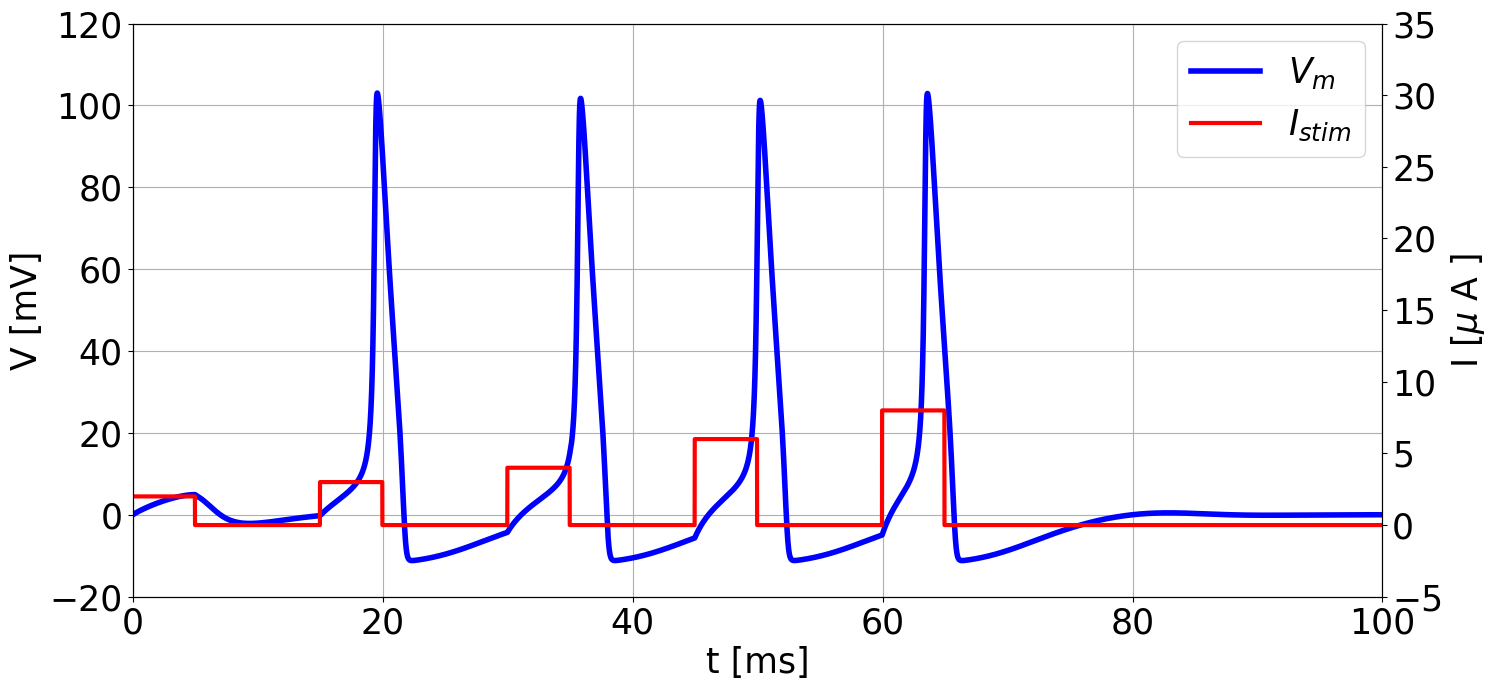

In [12]:
plot_HH(HHs[0], font=25)

<Figure size 3840x2880 with 0 Axes>

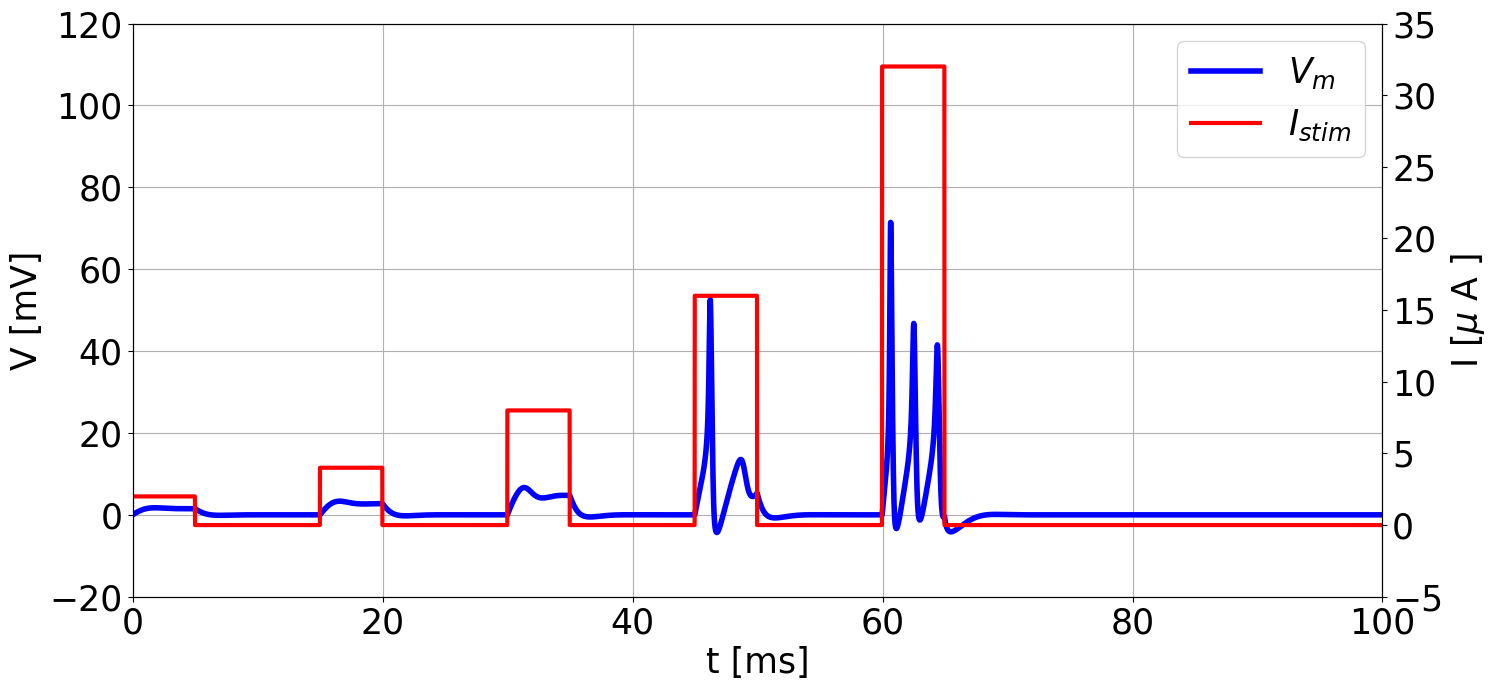

In [13]:
plot_HH(HHs[1], font=25)

In [14]:
def plot_currents_and_gates(neuron: HH_neuron, font=25):
    plt.gcf().set_dpi(600)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    labs_currents = [r'$ I_{Na} $', r'$ I_{K} $', r'$ I_{L} $']
    labs_gates = ['m', 'n', 'h']
    for i in range(3):
        # axs[0].plot(neuron.ts*1e3, neuron.I_ions[i, :], label=labs_currents[i],
        #             linewidth=4)
        axs[1].plot(neuron.ts*1e3, neuron.gates[i, :], label=labs_gates[i],
                    linewidth=4)
        # axs[0].set_ylabel(r'I [$\mu$ A ]', fontsize=font)
        axs[1].set_ylabel('opening probability', fontsize=font)

    for i in range(2):
        axs[0].plot(neuron.ts*1e3, neuron.I_ions[i, :], label=labs_currents[i],
                    linewidth=4)
        axs[0].set_ylabel(r'I [$\mu$ A ]', fontsize=font)


    axss = axs.ravel()
    for ax in axss:
        ax.set_xlabel('t [ms]', fontsize=font)
        ax.grid()
        ax.legend(fontsize=font)
        # ax.yaxis.major.formatter._useMathText = True
        ax.ticklabel_format(style='sci',scilimits=(0,2),axis='y')
        ax.tick_params(axis='both', labelsize=font)
    
    axs[0].set_ylim(-8e-4, 8e-4)
    axs[0].yaxis.get_offset_text().set_fontsize(font)

    plt.tight_layout()

<Figure size 3840x2880 with 0 Axes>

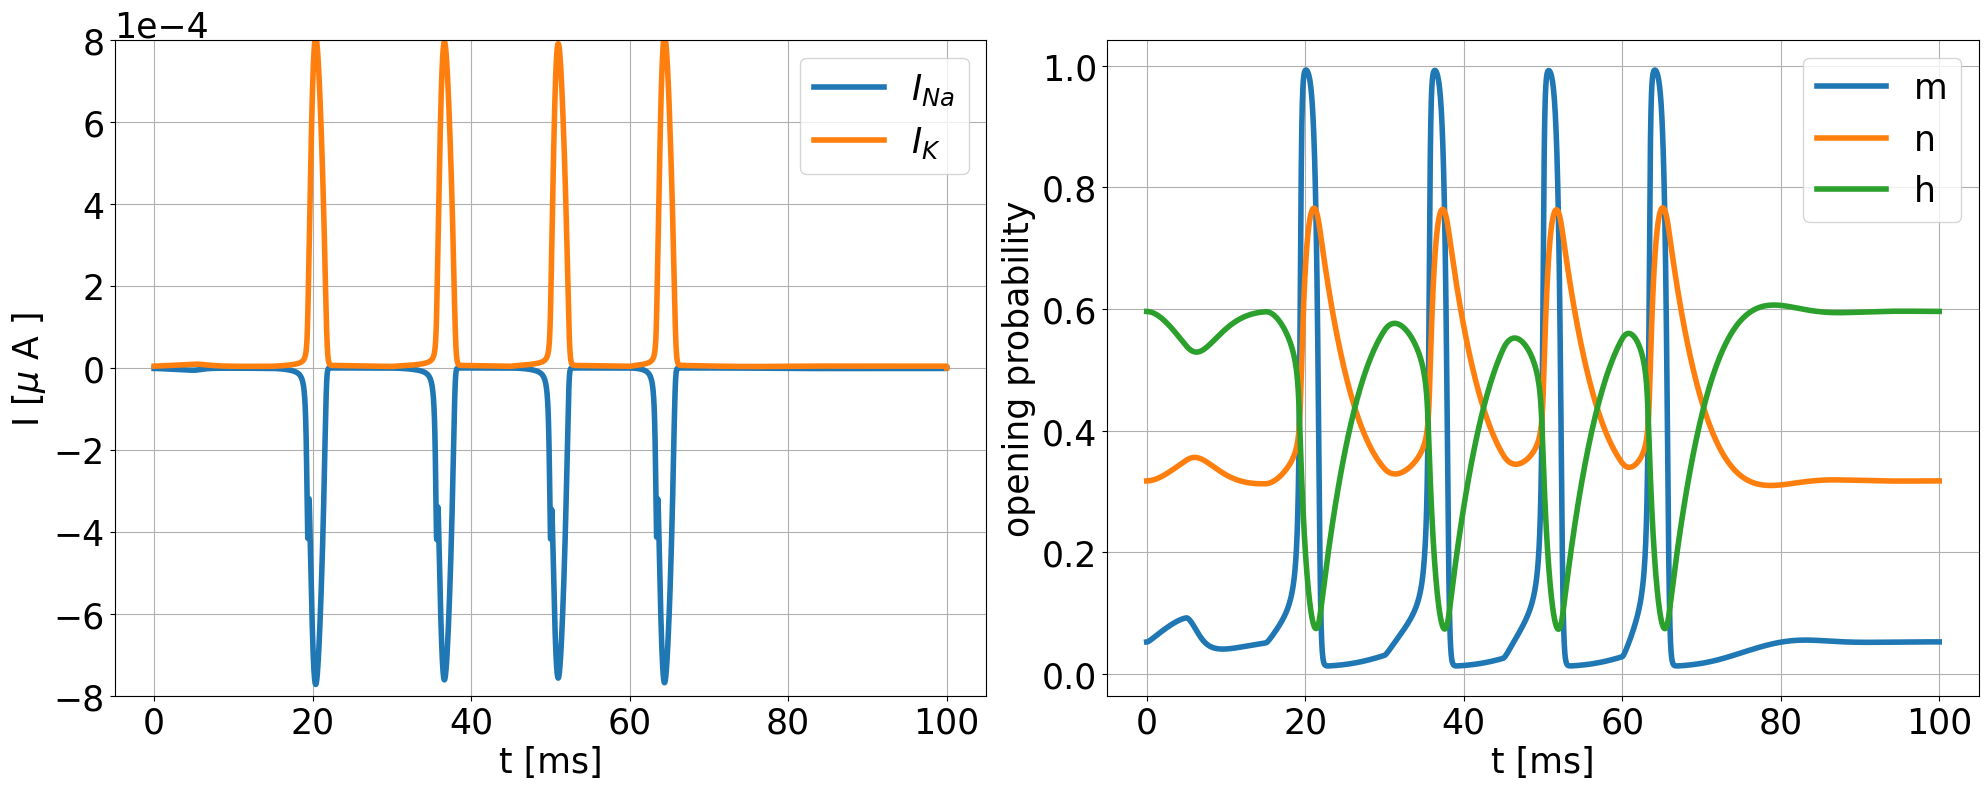

In [15]:
plot_currents_and_gates(HHs[0], font=25)

<Figure size 3840x2880 with 0 Axes>

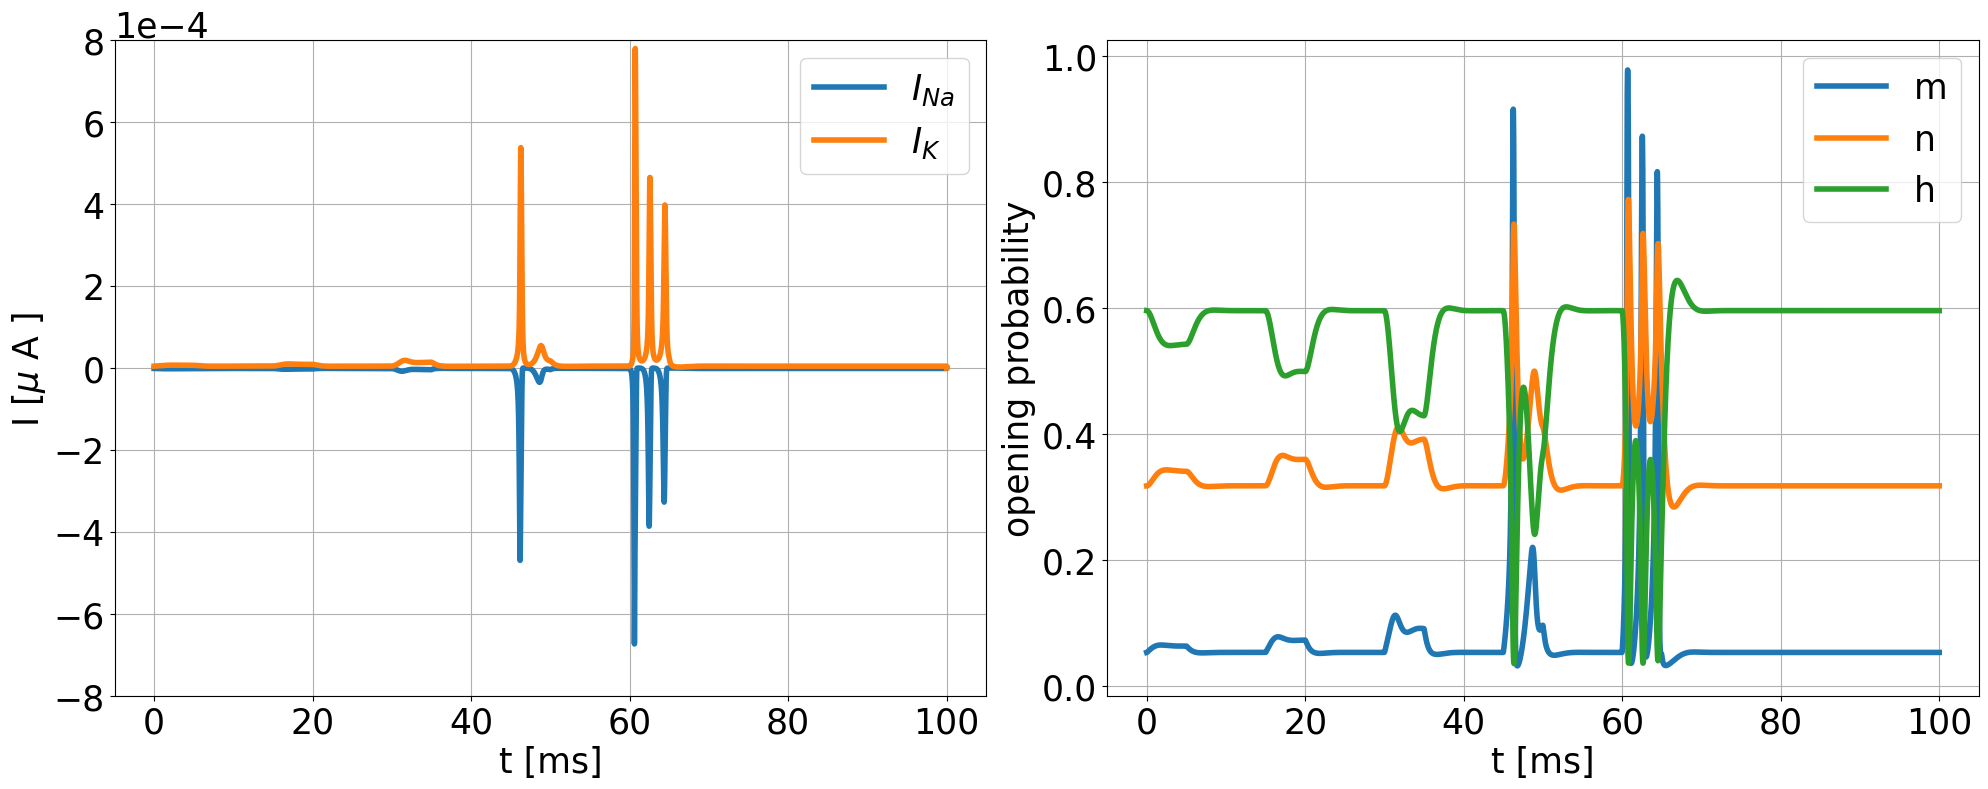

In [16]:
plot_currents_and_gates(HHs[1], font=25)